### librerias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar

## Transformacion de la base de datos a dataframes 
##### tenemos la necesidad de poder entender el comportamiento de la base de datos, por esta razon se procede a transformar las bases de datos en un formato manejable en python

In [2]:
# Carga los datos de los archivos Excel en los DataFrames
df_victimas = pd.read_excel('homicidios.xlsx', sheet_name='VICTIMAS')
df_hechos = pd.read_excel('homicidios.xlsx', sheet_name='HECHOS')

# Renombra columnas en df_victimas para evitar conflictos al combinar DataFrames
df_victimas.rename(columns={'VICTIMA': 'VICTIMA_victimas'}, inplace=True)

# Fusiona DataFrames basados en la columna ID_hecho
df_homicidios_fusionados = pd.merge(df_victimas, df_hechos[['ID', 'HORA', 'HH', 'LUGAR_DEL_HECHO', 'COMUNA', 'pos x', 'pos y', 'PARTICIPANTES', 'ACUSADO']],
                                     how='left', left_on='ID_hecho', right_on='ID')

# Elimina la columna ID ya que no es necesaria
df_homicidios_fusionados.drop(columns='ID', inplace=True)

# Renombra el DataFrame para evitar problemas en la definicion de columnas
ds_homicidios_fusionados = df_homicidios_fusionados.copy()

# Define el orden de las columnas
column_order = [
    'ID_hecho', 'FECHA', 'AAAA', 'MM', 'DD', 'HORA', 'HH', 'LUGAR_DEL_HECHO',
    'COMUNA', 'pos x', 'pos y', 'ROL', 'PARTICIPANTES', 'VICTIMA_victimas',
    'ACUSADO', 'EDAD', 'FECHA_FALLECIMIENTO'
]

# Reordena las columnas del DataFrame
ds_homicidios_fusionados = ds_homicidios_fusionados[column_order]

# Cambia el nombre de la columna 'VICTIMA_victimas' a 'VICTIMA'
ds_homicidios_fusionados.rename(columns={'VICTIMA_victimas': 'VICTIMA'}, inplace=True)

# Cambia el nombre de la columna 'EDAD' a 'EDAD_victima'
ds_homicidios_fusionados.rename(columns={'EDAD': 'EDAD_victima'}, inplace=True)

# Renombra el DataFrame para mayor comodidad
df_victimas = ds_homicidios_fusionados.copy()

# Muestra las primeras filas del DataFrame con las columnas ordenadas y renombradas
df_victimas.head()


,ID_hecho,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,COMUNA,pos x,pos y,ROL,PARTICIPANTES,VICTIMA,ACUSADO,EDAD_victima,FECHA_FALLECIMIENTO
0,2016-0001,2016-01-01,2016,1,1,04:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,8,-58.47533969,-34.68757022,CONDUCTOR,MOTO-AUTO,MOTO,AUTO,19,2016-01-01 00:00:00
1,2016-0002,2016-01-02,2016,1,2,01:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,9,-58.50877521,-34.66977709,CONDUCTOR,AUTO-PASAJEROS,AUTO,PASAJEROS,70,2016-01-02 00:00:00
2,2016-0003,2016-01-03,2016,1,3,07:00:00,7,AV ENTRE RIOS 2034,1,-58.39040293,-34.63189362,CONDUCTOR,MOTO-AUTO,MOTO,AUTO,30,2016-01-03 00:00:00
3,2016-0004,2016-01-10,2016,1,10,00:00:00,0,AV LARRAZABAL Y GRAL VILLEGAS CONRADO,8,-58.46503904,-34.68092974,CONDUCTOR,MOTO-SD,MOTO,SD,18,SD
4,2016-0005,2016-01-21,2016,1,21,05:20:00,5,AV SAN JUAN Y PRESIDENTE LUIS SAENZ PEÑA,1,-58.38718297,-34.62246630,CONDUCTOR,MOTO-PASAJEROS,MOTO,PASAJEROS,29,2016-02-01 00:00:00


##### se procede a leer la informacion del DAtaFrames, con la finalidad de encontrar valores nulos y/o faltantes, a demas se saber con que tipo de datos estamos tratando

In [3]:
# cuenta el total de filas dentro de DataFrame_victimas
total_filas = df_victimas.shape[0]
print("La cantidad total de filas en el DataFrame_victimas es:", total_filas)

# Obtiene información sobre el DataFrame_victimas
print(df_victimas.info())

La cantidad total de filas en el DataFrame_victimas es: 717
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   HORA                 717 non-null    object        
 6   HH                   717 non-null    object        
 7   LUGAR_DEL_HECHO      717 non-null    object        
 8   COMUNA               717 non-null    int64         
 9   pos x                717 non-null    object        
 10  pos y                717 non-null    object        
 11  ROL                  717 non-null    object        
 12  PARTICIPANTES        717 non-nul

##### se puede observar que no existen datos faltantes en las filas, dado que la base de datos contiene 717 filas y cada columna posee 717 entradas respectibamente.

## Trasnsformacion de datos 
##### se pocede a normalizar el data frame para poder trabajar mejor que tipo de dato de cada una de las colunas 


##### de la informacion obtenida por df_victimas.info(), tenemos la necesidad de poder determinar en particular que datos se encuentran dentro de FECHA_FALLECIMIENTO, dado que se espera una fecha y aparece como abject.

### contamos la cantidad de filas que son fechas y las que no

In [4]:
def contar_tipos_de_datos(df, nombre_columna):
    fechas = 0
    no_fechas = 0

    for valor in df[nombre_columna]:
        if pd.notna(valor):
            try:
                # trata de convertir el valor a un objeto datetime
                pd.to_datetime(valor, dayfirst=True)
                fechas += 1
            except ValueError:
                # si falla la transformacion, el valor no es una fecha
                no_fechas += 1

    return fechas, no_fechas

# cuenta la cantidad de datos en 'FECHA_FALLECIMIENTO', contando por separado fechas y las no_fechas
fechas, no_fechas = contar_tipos_de_datos(df_victimas, 'FECHA_FALLECIMIENTO')

print("Cantidad de valores que son fechas:", fechas)
print("Cantidad de valores que no son fechas:", no_fechas)


Cantidad de valores que son fechas: 649
Cantidad de valores que no son fechas: 68


#### leemos cada una de las las filas que no son fechas para poder ver su contenido

In [5]:
def listar_valores_no_fechas(df, nombre_columna):
    valores_no_fechas = []

    for indice, valor in df[nombre_columna].items():
        if pd.notna(valor):
            try:
                # trata de convertir el valor a un objeto datetime
                pd.to_datetime(valor, dayfirst=True)
            except ValueError:
                # si falla, el valor no es una fecha
                valores_no_fechas.append((indice, valor))

    return valores_no_fechas

# lista los valores que no son fecha
valores_no_fechas = listar_valores_no_fechas(df_victimas, 'FECHA_FALLECIMIENTO')

print("Valores que no son fechas:")
for indice, valor in valores_no_fechas:
    print(f"Fila {indice}: {valor}")


Valores que no son fechas:
Fila 3: SD
Fila 16: SD
Fila 19: SD
Fila 22: SD
Fila 33: SD
Fila 35: SD
Fila 36: SD
Fila 39: SD
Fila 46: SD
Fila 48: SD
Fila 49: SD
Fila 51: SD
Fila 52: SD
Fila 55: SD
Fila 56: SD
Fila 57: SD
Fila 58: SD
Fila 59: SD
Fila 63: SD
Fila 72: SD
Fila 74: SD
Fila 75: SD
Fila 77: SD
Fila 78: SD
Fila 81: SD
Fila 82: SD
Fila 84: SD
Fila 87: SD
Fila 89: SD
Fila 91: SD
Fila 93: SD
Fila 95: SD
Fila 96: SD
Fila 97: SD
Fila 98: SD
Fila 99: SD
Fila 100: SD
Fila 103: SD
Fila 108: SD
Fila 109: SD
Fila 110: SD
Fila 111: SD
Fila 112: SD
Fila 114: SD
Fila 115: SD
Fila 117: SD
Fila 119: SD
Fila 121: SD
Fila 124: SD
Fila 125: SD
Fila 127: SD
Fila 128: SD
Fila 132: SD
Fila 133: SD
Fila 134: SD
Fila 138: SD
Fila 140: SD
Fila 141: SD
Fila 142: SD
Fila 143: SD
Fila 144: SD
Fila 145: SD
Fila 181: SD
Fila 221: SD
Fila 242: SD
Fila 246: SD
Fila 253: SD
Fila 280: SD


#### tomamos la decicion de transformar ese identificador SD como un NaT(Not a Time) para poder trabajar mejor con esta columna mas a delante, ademas de transformar la columna 'HORA' a formato tiempo

In [6]:
# normalizacion de 'FECHA_FALLECIMIENTO' en nuestro dataframe
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'], errors='coerce')

# Convertir la columna 'HORA' a formato de tiempo
df_victimas['HORA'] = df_victimas['HORA'].replace('SD', pd.NaT)

# Convertir la columna 'FECHA' a tipo datetime
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

# Verificar el cambio
print(df_victimas.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID_hecho             717 non-null    object        
 1   FECHA                717 non-null    datetime64[ns]
 2   AAAA                 717 non-null    int64         
 3   MM                   717 non-null    int64         
 4   DD                   717 non-null    int64         
 5   HORA                 716 non-null    object        
 6   HH                   717 non-null    object        
 7   LUGAR_DEL_HECHO      717 non-null    object        
 8   COMUNA               717 non-null    int64         
 9   pos x                717 non-null    object        
 10  pos y                717 non-null    object        
 11  ROL                  717 non-null    object        
 12  PARTICIPANTES        717 non-null    object        
 13  VICTIMA              717 non-null  

##### tras esta operacion nos vemos en una situacion de perdida de datos en fechas, pero desde el principio estos datos no corespondian con un vavol datetime. 

### Identificación de valores atípicos/extremos u outliers
- Dado que solo la variable de edad muestra una variación numérica, nos enfocaremos en determinar los valores máximos y mínimos para detectar posibles valores atípicos o fuera del rango esperado.

In [7]:
# Convertir la columna 'EDAD' a tipo numérico, ignorando los valores no numéricos
df_victimas['EDAD_victima'] = pd.to_numeric(df_victimas['EDAD_victima'], errors='coerce')

# Calcular el valor máximo de la columna 'EDAD'
maximo_edad = df_victimas['EDAD_victima'].max()

# Calcular el valor mínimo de la columna 'EDAD'
minimo_edad = df_victimas['EDAD_victima'].min()

# Mostrar los valores máximo y mínimo
print("Valor máximo de EDAD:", maximo_edad)
print("Valor mínimo de EDAD:", minimo_edad)



Valor máximo de EDAD: 95.0
Valor mínimo de EDAD: 1.0


### conteo de valores duplicados

In [8]:
# Calcula la cantidad de duplicados en cada columna
duplicados_por_columna = df_victimas.apply(lambda x: x.duplicated().sum())

# Crea un diccionario para almacenar los valores repetidos y su frecuencia
valores_repetidos = {}

# Itera sobre las columnas del DataFrame
for columna in df_victimas.columns:
    # Encuentra los valores duplicados en la columna actual
    duplicados = df_victimas[columna][df_victimas[columna].duplicated()]
    # Almacena los valores repetidos y su frecuencia en el diccionario
    valores_repetidos[columna] = duplicados.value_counts()

# Imprime la cantidad de duplicados en cada columna
print("Cantidad de registros duplicados en cada columna:")
print(duplicados_por_columna)
print()

# Imprime los valores repetidos y su frecuencia
print("Valores repetidos en cada columna y su frecuencia:")
for columna, valores in valores_repetidos.items():
    print(f"Columna: {columna}")
    print(valores)
    print()


Cantidad de registros duplicados en cada columna:
ID_hecho                21
FECHA                  119
AAAA                   711
MM                     705
DD                     686
HORA                   342
HH                     692
LUGAR_DEL_HECHO         34
COMUNA                 701
pos x                  112
pos y                  112
ROL                    712
PARTICIPANTES          676
VICTIMA                709
ACUSADO                707
EDAD_victima           631
FECHA_FALLECIMIENTO    154
dtype: int64

Valores repetidos en cada columna y su frecuencia:
Columna: ID_hecho
ID_hecho
2017-0035    2
2016-0041    1
2018-0026    1
2020-0063    1
2020-0038    1
2019-0010    1
2018-0128    1
2018-0098    1
2018-0085    1
2018-0038    1
2018-0015    1
2016-0126    1
2017-0153    1
2017-0126    1
2017-0112    1
2017-0108    1
2017-0050    1
2017-0036    1
2017-0026    1
2020-0077    1
Name: count, dtype: int64

Columna: FECHA
FECHA
2017-03-23    2
2020-12-25    2
2018-04-27    2
201

##### Los valores que aparecen repetidos eran de esperarse, dada la naturaleza de la base de datos y los valores que nos muestra su diccionario. Sin embargo, se prestó especial atención a la última columna, 'FECHA_FALLECIMIENTO', en la cual pudimos identificar los valores 'SD' y comprender su significado.

## Algunos estadisticos

#### calculo de estadísticas resumidas sobre la cantidad de accidentes de tráfico registrados en cada mes para cada año.

In [9]:
# Crea una lista para almacenar los resultados de cada año
resultados = []

# Itera sobre los años y calcular los estadísticos para cada año
for año in df_victimas['FECHA'].dt.year.unique():
    # Filtra el DataFrame por el año actual
    df_año_actual = df_victimas[df_victimas['FECHA'].dt.year == año]
    
    # Agrupa los datos por mes y cuenta la cantidad de accidentes en cada mes
    accidentes_por_mes = df_año_actual.groupby(df_año_actual['FECHA'].dt.month).size()
    
    # Calcula la media, moda, varianza y desviación estándar para el año actual
    media = np.mean(accidentes_por_mes)
    moda = int(accidentes_por_mes.idxmax())
    varianza = np.var(accidentes_por_mes)
    desviacion_estandar = np.std(accidentes_por_mes)
    
    # Agrega los resultados a la lista de resultados
    resultados.append({'Año': año, 'Media': media, 'Moda': moda, 'Varianza': varianza, 'Desviación Estándar': desviacion_estandar})

# Convierte la lista de resultados en un DataFrame
estadisticos = pd.DataFrame(resultados)

# Muestra el DataFrame de estadísticos
print(estadisticos)


    Año      Media  Moda   Varianza  Desviación Estándar
0  2016  12.166667    12   8.472222             2.910708
1  2017  11.666667     5   6.055556             2.460804
2  2018  12.416667     8   6.743056             2.596739
3  2019   8.666667     8   6.222222             2.494438
4  2020   6.750000    12  25.520833             5.051815
5  2021   8.083333     1   6.743056             2.596739


con estos datos obtenidos podemos tener una visión general de la distribución y variabilidad de los accidentes viales a lo largo de los años en función de la cantidad de accidentes por mes, junto con medidas resumidas como la media, moda, varianza y desviación estándar.

## Creación de un archivo CSV para compartir la base de datos de siniestros viales
#### Se procede a crear un archivo llamado 'siniestros_viales.csv' con el fin de compartir la base de datos y facilitar su tratamiento con distintos programas.

In [10]:
ruta_archivo_csv = 'siniestros_viales.csv'

# Guardar el DataFrame como un archivo CSV
df_victimas.to_csv(ruta_archivo_csv, index=False)

# Mensaje de confirmación
print("El archivo CSV se ha creado exitosamente.")

El archivo CSV se ha creado exitosamente.


## Creacion de graficos
##### para poder entender el comportamiento de la inseguridad vial

### histograma Cantidad de Accidentes por año

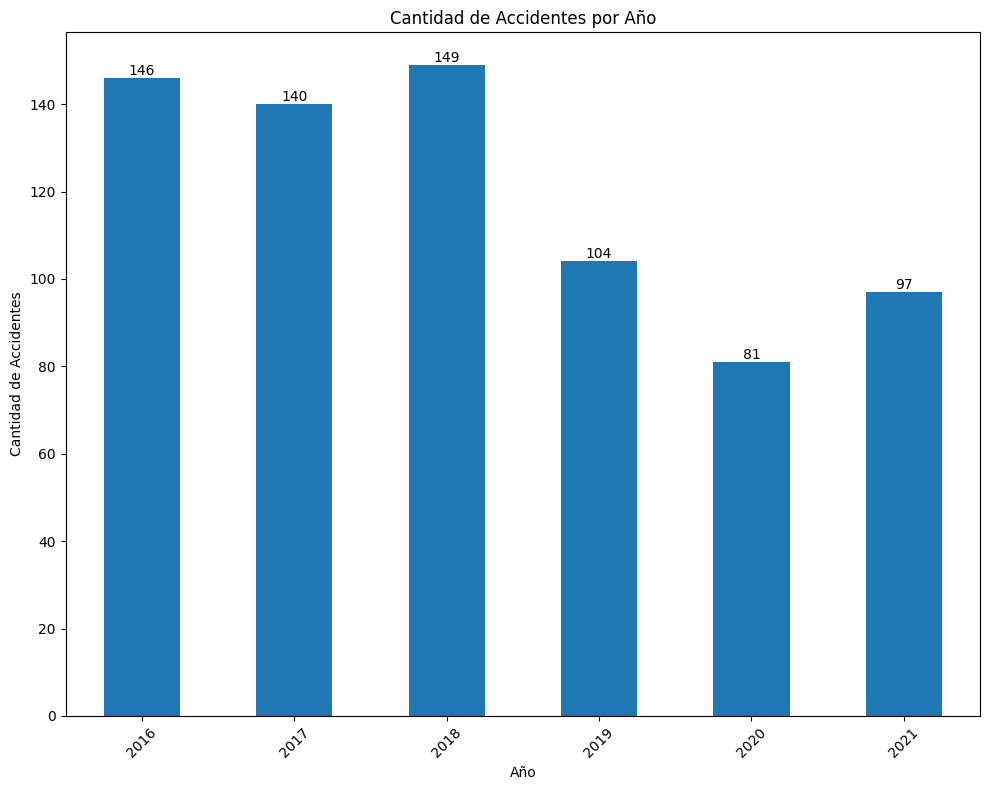

In [11]:
# Carga el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

# Conveierte la columna 'FECHA' a tipo datetime
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

# Extrae el año de la columna 'FECHA'
df_victimas['Año'] = df_victimas['FECHA'].dt.year

# Agrupa los datos por año y cuenta la cantidad de accidentes en cada año
accidentes_por_año = df_victimas.groupby('Año').size()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Grafica los datos en un histograma
accidentes_por_año.plot(kind='bar', ax=ax)
plt.title('Cantidad de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)

# Agrega el valor numérico de cada columna en el histograma
for i, v in enumerate(accidentes_por_año):
    ax.text(i, v + 0, str(v), ha='center', va='bottom')

plt.tight_layout()
plt.show()


##### Al observar el histograma 'Cantidad de Accidentes por Año, notamos una tendencia hacia la disminución de accidentes a lo largo de los años. Sin embargo, es importante destacar que esta reducción no es tan pronunciada como se esperaba. Por ejemplo, en 2016 hubo un total de 146 accidentes, mientras que en 2021 este número fue de 97. Aunque se observa una ligera mejoría en la seguridad vial, esta disminución no alcanza los niveles deseados para considerarla significativa. Es necesario seguir implementando medidas y políticas de seguridad vial para lograr una reducción más sustancial en el número de accidentes en el futuro.

### Comparación entre las víctimas de accidentes y la incidencia de fallecidos.

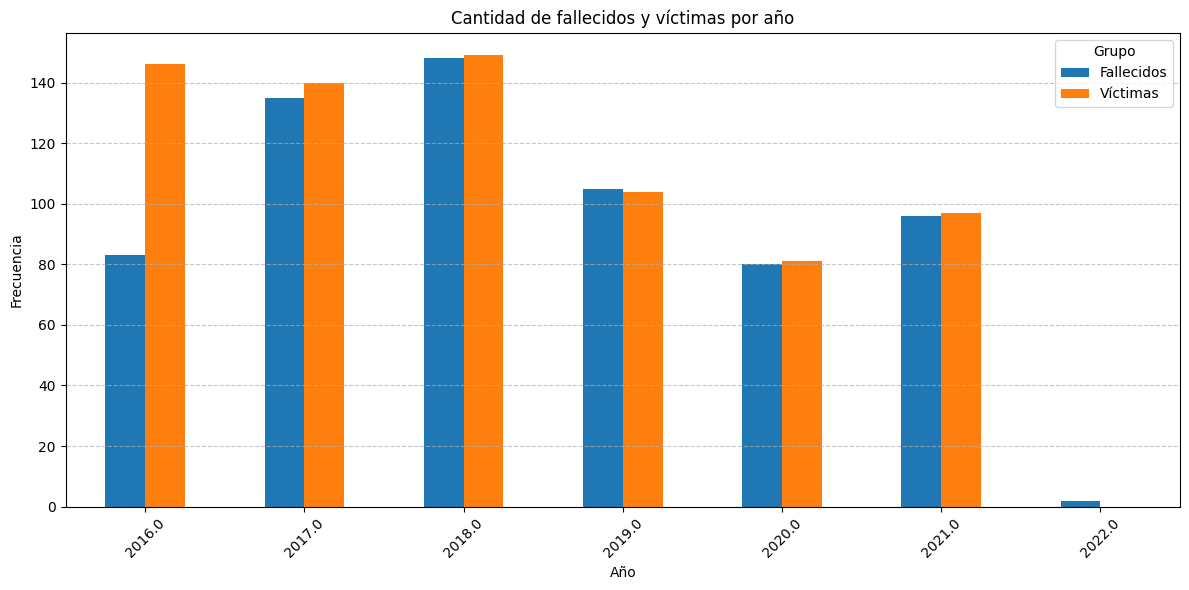

In [12]:
# Cargar el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

# Convierte las columnas de fecha a tipo datetime sin especificar formato
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])
df_victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(df_victimas['FECHA_FALLECIMIENTO'])

# Calcula la cantidad de fallecidos por año
fallecidos_por_año = df_victimas.groupby(df_victimas['FECHA_FALLECIMIENTO'].dt.year).size()

# Calcula la cantidad de víctimas por año
victimas_por_año = df_victimas.groupby(df_victimas['FECHA'].dt.year).size()

# Crea un DataFrame para mostrar los resultados
resultados = pd.DataFrame({
    'Fallecidos': fallecidos_por_año,
    'Víctimas': victimas_por_año
})

# Crea el gráfico de barras
resultados.plot(kind='bar', figsize=(12, 6))

# Añade etiquetas y título
plt.title('Cantidad de fallecidos y víctimas por año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Grupo')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Mouestra el gráfico
plt.show()


##### Podemos concluir inicialmente que la tasa de mortalidad en accidentes de tráfico es tan elevada como la tasa de accidentes de este mismo tipo. A partir de este punto, dirigiremos nuestro análisis al estudio de las víctimas, considerando cada una de ellas como un potencial fallecimiento en estos incidentes.

### Cantidad de Accidentes a lo largo del tiempo

#### El diagrama de línea "Cantidad de Accidentes por Mes y Año" nos ofrece una visión detallada del comportamiento mensual de los accidentes, lo que nos permite identificar tendencias y posibles fluctuaciones a lo largo del tiempo. Con este análisis, podemos detectar meses con un aumento significativo en la incidencia de accidentes, lo que nos alerta sobre períodos críticos. Además, la comparación directa con el mismo período del año anterior nos permite evaluar cambios en la tendencia general de accidentes, ofreciendo una visión más completa de la seguridad vial a lo largo del tiempo y ayudándonos a tomar medidas preventivas adecuadas.

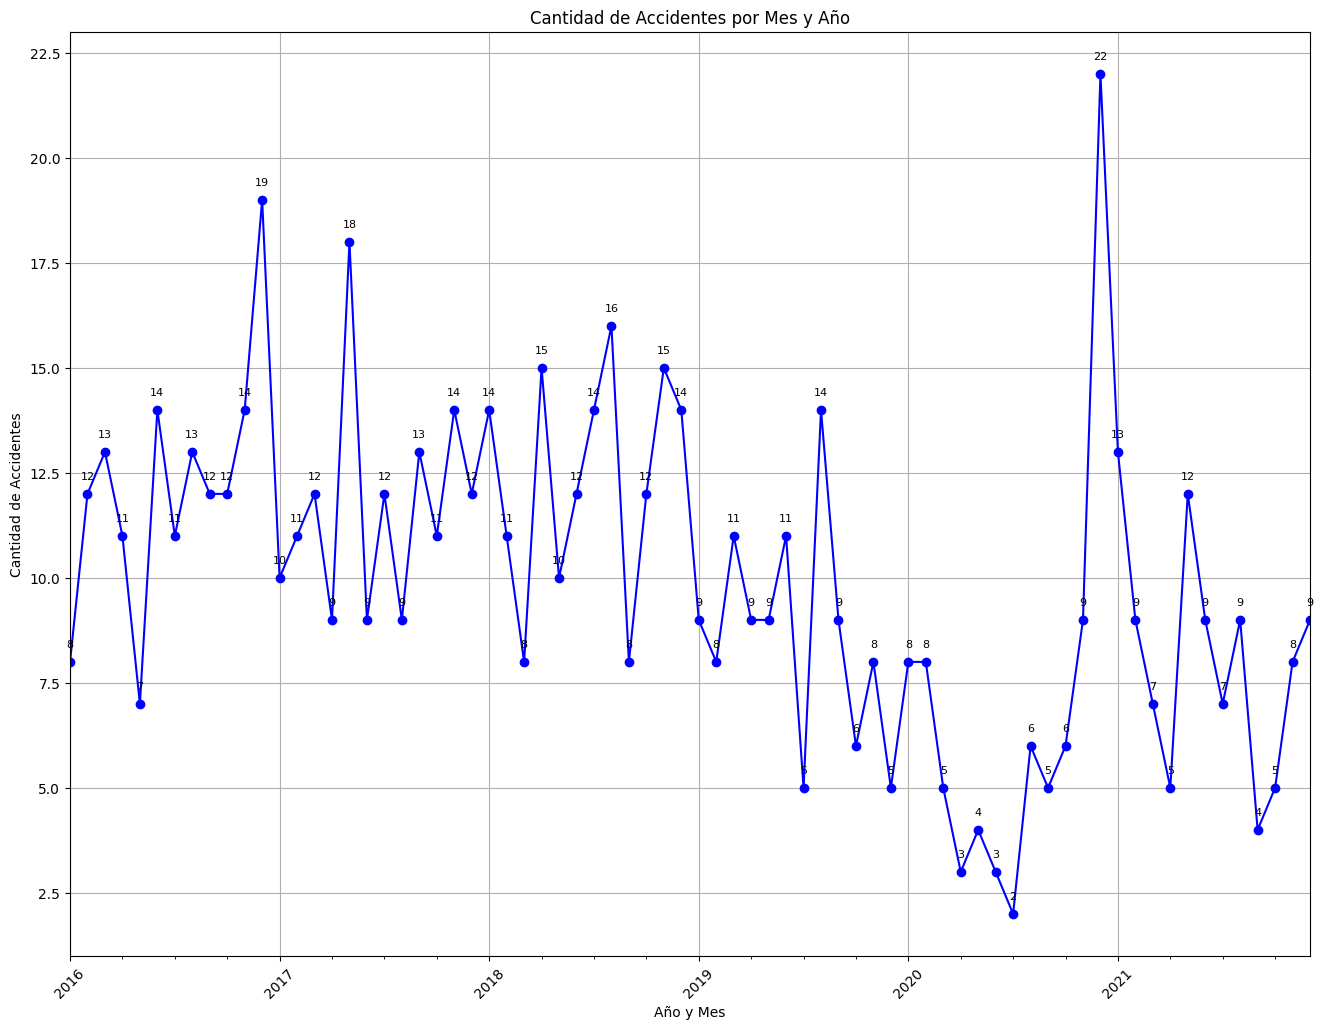

In [13]:
# Carga el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

# Convierte la columna 'FECHA' a datetime
df_victimas['FECHA'] = pd.to_datetime(df_victimas['FECHA'])

# Crea una nueva columna que contenga el año y el mes combinados
df_victimas['Año_Mes'] = df_victimas['FECHA'].dt.to_period('M')

# Agrupa los datos por año y mes, y cuenta la cantidad de accidentes en cada grupo
accidentes_por_mes_y_año = df_victimas.groupby('Año_Mes').size()

# Crea la figura y los ejes
fig, ax = plt.subplots(figsize=(16, 12))

# Grafica los datos en un gráfico de líneas
accidentes_por_mes_y_año.plot(kind='line', marker='o', linestyle='-', color='b')
plt.title('Cantidad de Accidentes por Mes y Año')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad de Accidentes')
plt.xticks(rotation=45)

# Muestra la grilla
plt.grid(True)

# Agrega etiquetas de valor numérico en los puntos de datos
for i, v in enumerate(accidentes_por_mes_y_año):
    mes = accidentes_por_mes_y_año.index[i]
    plt.annotate(f'{v}', (accidentes_por_mes_y_año.index[i], v), textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

plt.show()



- Se puede observar un patrón altamente fluctuante en la incidencia de accidentes, tanto de mes a mes como de año a año, lo que dificulta sacar conclusiones claras sobre estacionalidad o tendencias consistentes a lo largo del tiempo. Sin embargo, destacan dos picos notablemente pronunciados ocurridos antes del inicio de la pandemia de COVID-19, en diciembre de 2016 y mayo de 2017. Aunque se podría inferir que el primer pico está relacionado con el período de vacaciones de verano, esta suposición no es concluyente.

- Durante la primera etapa de la pandemia, cuando se implementaron controles más estrictos entre febrero de 2020 y octubre de 2020, se observó una marcada disminución en la tasa de accidentes. Se podría especular que esta reducción se debió a las restricciones impuestas por la crisis sanitaria más que a una mejora real en la seguridad vial. Este supuesto se respalda con el incremento significativo de casos en noviembre de 2020, seguido de un récord en diciembre del mismo año, superando los registros de los seis años analizados en esta base de datos.

- En resumen, debido a la variabilidad significativa en la incidencia de accidentes a lo largo del tiempo y la presencia de eventos disruptivos como la pandemia de COVID-19, resulta difícil sacar conclusiones definitivas sobre una tendencia clara hacia la reducción de accidentes de tránsito a medida que transcurren los años.

### empezamos a ver en detalle cada uno de los Vehículo que ocupaba quien haya fallecido o se haya lastimado a raíz del hecho, o bien peatón/a. 

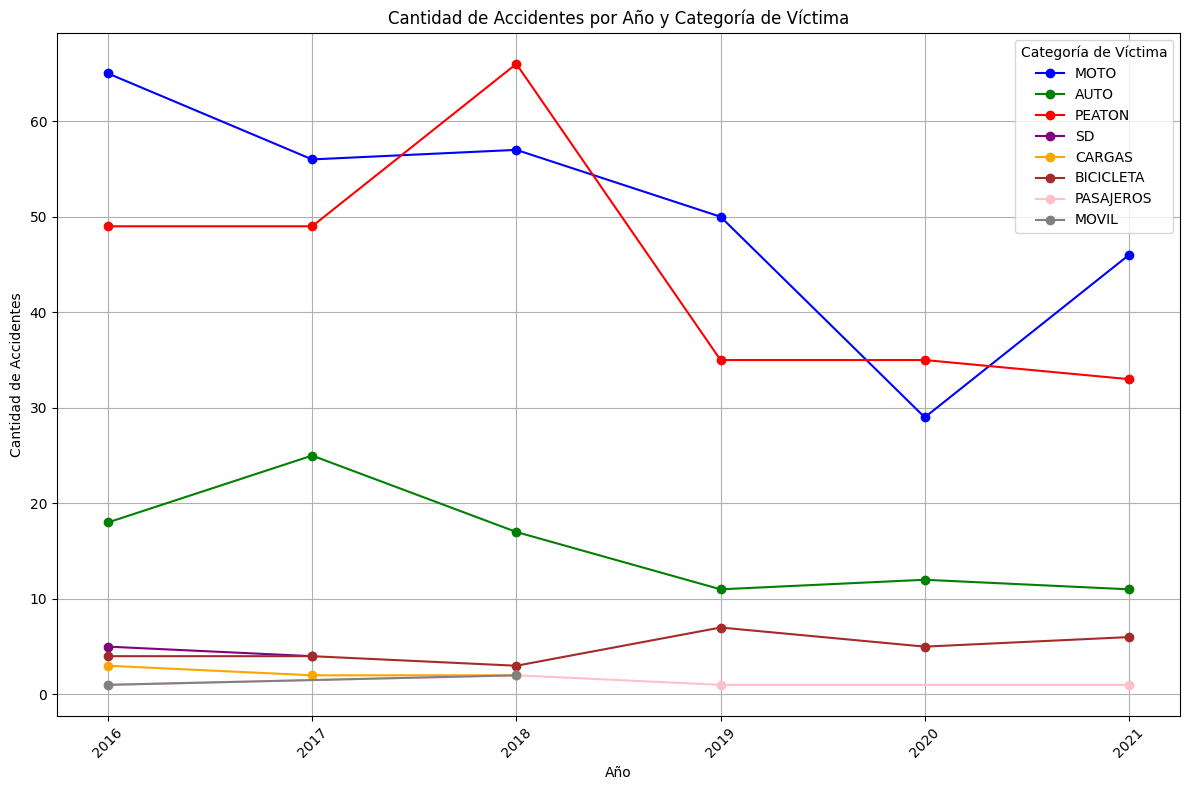

In [14]:
# Carga el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

def generar_grafico_por_categoria(df, categoria_column):
    plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
    
    # Colores para las líneas
    colores = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray', 'olive', 'cyan']
    
    categorias_unicas = df[categoria_column].unique()
    
    if len(categorias_unicas) > len(colores):
        print("Advertencia: Hay más categorías que colores predefinidos. Algunas categorías pueden compartir color.")
    
    for i, categoria in enumerate(categorias_unicas):
        # Filtra el DataFrame por la categoría actual
        df_categoria = df[df[categoria_column] == categoria]
        
        # Utiliza .copy() para evitar SettingWithCopyWarning , Esta advertencia se genera cuando se realiza una operación de indexación en un DataFrame que puede devolver una vista (una vista de un DataFrame original) en lugar de una copia
        df_categoria = df_categoria.copy()
        
        # Convierte la columna 'FECHA' a datetime
        df_categoria['FECHA'] = pd.to_datetime(df_categoria['FECHA'])
        
        # Extrae el año de la fecha
        df_categoria['Año'] = df_categoria['FECHA'].dt.year
        
        # Ccuenta la cantidad de accidentes por año
        accidentes_por_año = df_categoria.groupby('Año').size()
        
        # Crea el gráfico de líneas con un color específico para cada categoría
        plt.plot(accidentes_por_año.index, accidentes_por_año.values, marker='o', label=categoria, color=colores[i % len(colores)])

    # Configuración del gráfico
    plt.title('Cantidad de Accidentes por Año y Categoría de Víctima')
    plt.xlabel('Año')
    plt.ylabel('Cantidad de Accidentes')
    plt.xticks(rotation=45)
    plt.legend(title='Categoría de Víctima')
    plt.grid(True)
    
    # Muestra el gráfico
    plt.tight_layout()
    plt.show()

# Genera el gráfico para cada categoría
generar_grafico_por_categoria(df_victimas, 'VICTIMA')



#### Del análisis del gráfico anterior, se pueden extraer las siguientes conclusiones:

- Tendencias a lo largo de los años: Se observa una variabilidad en la cantidad de accidentes entre las diferentes categorías de víctimas a lo largo de los años. Mientras que las cifras de 'PEATON' y 'MOTO' muestran fluctuaciones preocupantes, indicativas de una seria falta de seguridad vial en estas categorías, otras como 'AUTO' y 'PASAJEROS' parecen mantenerse más estables y en descenso. Además, preocupa el incremento de casos en la categoría 'BICICLETA'.
- Prioridades de seguridad vial: Los datos destacan las categorías de víctimas más afectadas por los accidentes de tráfico en cada año. Aunque se observa una disminución en la tasa de accidentes fatales para 'MOTOS' y 'PEATONES', estas dos categorías siguen siendo las más vulnerables, superando ampliamente la media anual en cada periodo. Es esencial desarrollar campañas de concientización en seguridad vial para abordar esta preocupación. Asimismo, se evidencia una inquietud en los accidentes que involucran categorías como 'AUTO' y 'BICICLETA', aunque sus cifras no sean tan elevadas como las de 'MOTO', siguen siendo preocupantes y requieren un enfoque riguroso en materia de seguridad vial.
- Cambios en la cantidad de accidentes por categoría: Se observa una disminución continua en la tasa de accidentes en la categoría 'AUTO'. Sin embargo, otras categorías pueden mostrar tendencias diferentes que requieren atención.
- Impacto de las medidas de seguridad: La presencia de una cantidad relativamente constante de accidentes en algunas categorías a lo largo de los años sugiere la necesidad de mejoras en las medidas de seguridad vial. Por lo tanto, se requiere una campaña intensiva sobre seguridad vial y una mayor fiscalización en todas las áreas relacionadas con este tema.

### Análisis de la Influencia de la Edad en la Incidencia de Accidentes de Tráfico

#### Se calcula la media de la cantidad de accidentes para cada grupo de edad y se representan estas medias en un gráfico de líneas, destacando las tendencias según la edad a lo largo del tiempo.

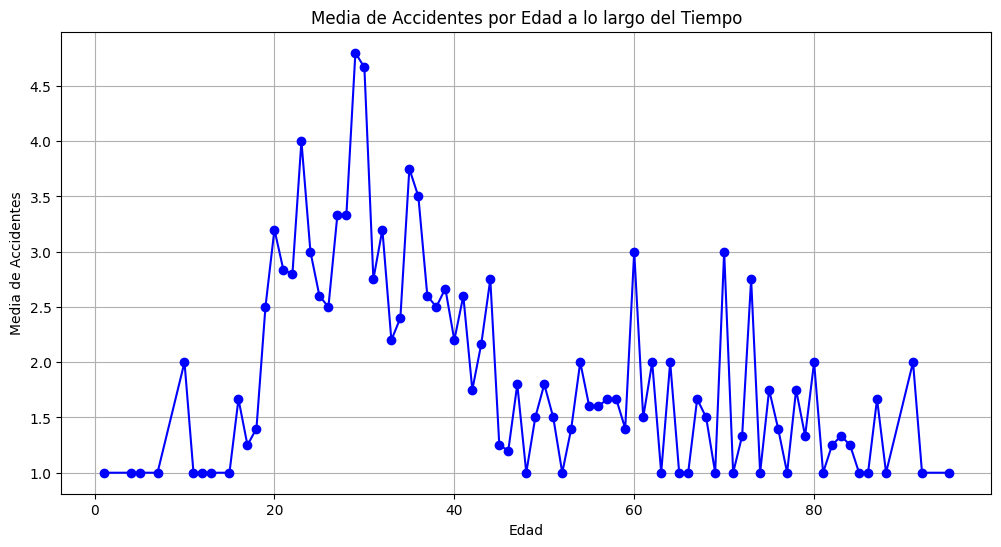

In [15]:
# Carga el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

# Agrupa los datos por edad y año, y calcula la cantidad de accidentes para cada grupo
accidentes_por_edad_y_año = df_victimas.groupby(['EDAD_victima', 'AAAA']).size().reset_index(name='Cantidad')

# Calcula la media de la cantidad de accidentes para cada edad
media_por_edad = accidentes_por_edad_y_año.groupby('EDAD_victima')['Cantidad'].mean().reset_index(name='Media')

# Crea el gráfico de líneas para mostrar la media de accidentes por edad a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(media_por_edad['EDAD_victima'], media_por_edad['Media'], marker='o', linestyle='-', color='b')
plt.title('Media de Accidentes por Edad a lo largo del Tiempo')
plt.xlabel('Edad')
plt.ylabel('Media de Accidentes')
plt.grid(True)
plt.show()


- Al analizar los datos inicialmente, se observa que el grupo de edad más frecuentemente asociado con accidentes de tránsito se encuentra en el rango de 20 a 40 años. Este grupo demográfico presenta una incidencia considerablemente mayor en comparación con otros grupos de edad. Por lo tanto, es prioritario diseñar un plan de capacitación en seguridad vial enfocado específicamente en este grupo, así como implementar controles más rigurosos para esta parte de la población.
- Se pueden identificar picos significativos en la distribución de accidentes de tránsito en el rango de edades de 60 a 80 años. Estos picos indican una incidencia notable de accidentes en este grupo demográfico, lo que sugiere la necesidad de prestar una mayor atención y enfoque en la seguridad vial para estas edades.

#### Se estudiará la relación entre las edades y el tipo de vehículo ocupado por las personas fallecidas o heridas como resultado del incidente, así como también de los peatones, con el fin de comprender mejor el comportamiento de cada grupo etario en relación específica al tipo de siniestro.

<Figure size 2000x5100 with 0 Axes>

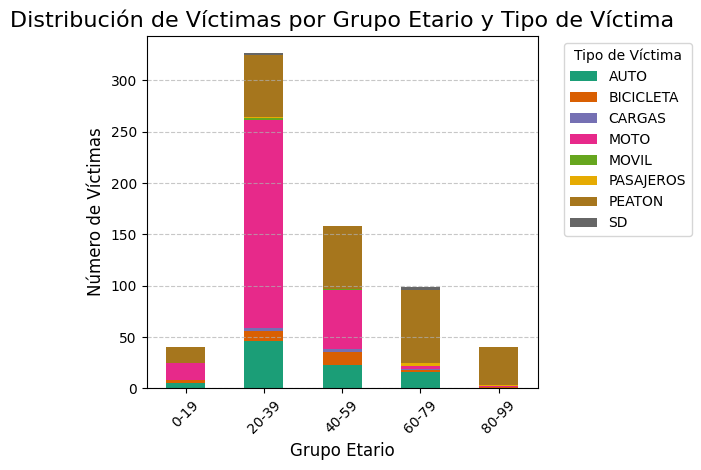

In [16]:
# Carga el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

# Convierte la columna 'EDAD' a tipo numérico
df_victimas['EDAD_victima'] = pd.to_numeric(df_victimas['EDAD_victima'], errors='coerce')

# Elimina filas con valores de edad faltantes
df_victimas = df_victimas.dropna(subset=['EDAD_victima'])

# Define los intervalos de edad y las etiquetas para los intervalos
bins = range(0, 121, 20)  # Extendemos un poco el rango para incluir todas las edades
labels = [f'{i}-{i+19}' for i in range(0, 101, 20)]

# Agrupa las edades en los intervalos definidos
df_victimas.loc[:, 'GRUPO_HETARIO'] = pd.cut(df_victimas['EDAD_victima'], bins=bins, labels=labels, right=False)

# Cuenta el número de víctimas en cada grupo etario para cada tipo de víctima
grupo_hetario_victima_counts = df_victimas.groupby(['GRUPO_HETARIO', 'VICTIMA'], observed=True).size().unstack(fill_value=0)

# Crea el gráfico de barras
plt.figure(figsize=(20, 51))  # Aumentamos el tamaño de la figura
# Utilizamos una paleta de colores pastel
colores = plt.cm.Dark2(range(len(grupo_hetario_victima_counts.columns)))
grupo_hetario_victima_counts.plot(kind='bar', stacked=True, color=colores)

# Añade etiquetas y títulos
plt.title('Distribución de Víctimas por Grupo Etario y Tipo de Víctima', fontsize=16)  # Ajustamos el tamaño del título
plt.xlabel('Grupo Etario', fontsize=12)  # Ajustamos el tamaño de la etiqueta x
plt.ylabel('Número de Víctimas', fontsize=12)  # Ajustamos el tamaño de la etiqueta y
plt.xticks(rotation=45, fontsize=10)  # Ajustamos el tamaño y la rotación de las etiquetas x
plt.yticks(fontsize=10)  # Ajustamos el tamaño de las etiquetas y
plt.legend(title='Tipo de Víctima', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)  # Ajustamos el tamaño de la leyenda
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


- Del gráfico anterior, podemos observar una vez más la grave falta de seguridad vial que afecta directamente a un grupo muy específico de la población, principalmente entre los 20 y 40 años. Este grupo debería ser el enfoque principal al abordar mejoras en el proceso de educación vial y al implementar mayores controles para incentivar la reducción de la alta cantidad de víctimas fatales.
- Aunque los grupos restantes no llegan a la media de víctimas del grupo etario de entre 20 y 40 años, es preocupante los altos niveles de víctimas que presentan estos grupos.
- También es importante destacar que los peatones, independientemente del grupo al que pertenezcan, son siempre uno de los factores más perjudicados en cuanto a seguridad vial, siendo aún más prevalente en los grupos de 60 a 100 años. Por esta razón, es crucial insistir una vez más en la delicada situación que se presenta en cuanto a seguridad vial y la necesidad de tomar medidas enérgicas para comenzar a disminuir la tasa de fatalidades.
- Es evidente la concentración de víctimas en el segmento 'MOTO', que está relacionada con la franja etaria de 20 a 40 años. Se podrían extraer algunas conclusiones apresuradas, como la negligencia y temerariedad de este grupo etario. Sin embargo, debemos ser cautelosos al sacar estas primeras aproximaciones, ya que los datos proporcionados no nos indican en primera instancia si el fallecimiento es producto de negligencia propia o de terceros.

### Análisis de los Momentos del Día con Mayor Incidencia de Accidentes Viales

##### se analizará la distribución de accidentes viales a lo largo del día. Utilizando datos recopilados de incidentes ocurridos desde el año 2016 hasta finales del 2021 y se calculará el promedio de accidentes por hora. El objetivo es visualizar, a través de un gráfico de barras, las horas del día en las que se registra una mayor cantidad de accidentes de tráfico.

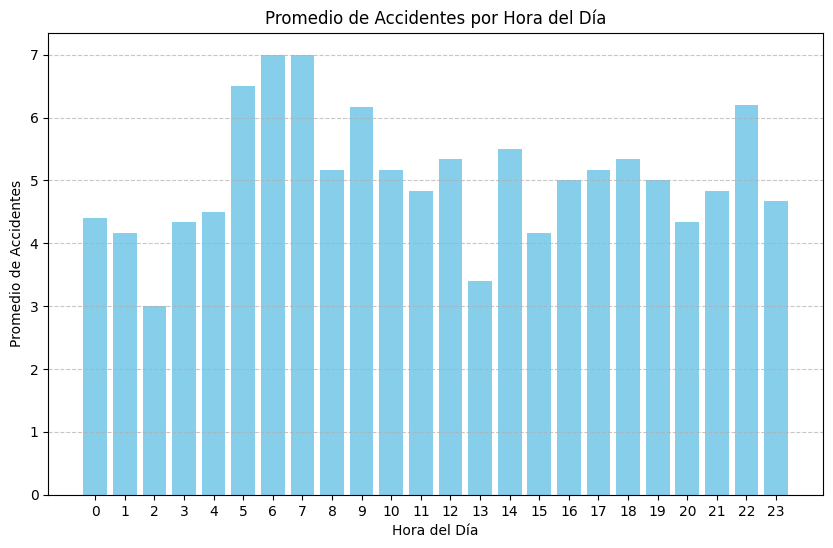

In [17]:
# Carga el archivo 'siniestros_viales.csv' en un DataFrame df_victimas
df_victimas = pd.read_csv('siniestros_viales.csv')

# Convierte la columna 'HORA' al formato datetime, saltando los valores incorrectos
df_victimas['HORA'] = pd.to_datetime(df_victimas['HORA'], format='%H:%M:%S', errors='coerce')

# Elimina filas con valores NaT en la columna 'HORA'
df_victimas = df_victimas.dropna(subset=['HORA'])

# Agrupa por año y por hora, cuenta la cantidad de accidentes en cada hora para cada año
accidentes_por_ano_hora = df_victimas.groupby([df_victimas['AAAA'], df_victimas['HORA'].dt.hour]).size().reset_index(name='Cantidad de Accidentes')

# Calcula el promedio de accidentes por hora para todos los años
promedio_accidentes_por_hora = accidentes_por_ano_hora.groupby('HORA')['Cantidad de Accidentes'].mean().reset_index(name='Promedio de Accidentes')

# Ordena las horas por promedio de accidentes en orden descendente
promedio_accidentes_por_hora = promedio_accidentes_por_hora.sort_values(by='Promedio de Accidentes', ascending=False)

# Grafica los resultados
plt.figure(figsize=(10, 6))
plt.bar(promedio_accidentes_por_hora['HORA'], promedio_accidentes_por_hora['Promedio de Accidentes'], color='skyblue')
plt.title('Promedio de Accidentes por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Promedio de Accidentes')
plt.xticks(promedio_accidentes_por_hora['HORA'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


- se puede concluir que la mayor incidencia de accidentes viales son en el horario de actividad matitina, entre las 5 y las 7 de la mañana. cave destacar, que esto es solo una representacion generalizada para tratar de entender donde existe un foco en la escala de tiempo diario en la cual el servicio de seguridad vial debera tomar recaudos a la hora de tomar deciciones para poder reducir esta brecha entre las distintas horas del dia.
- por otra parte en promedio se puede apreciar de todas manera valores demaciado elevados. esto solo nos permite concluir una sola realidad, y es que faltan campañas de concientizacion, visivilizacion y fiscalizacion con respecto a este tema a demas de una falta en la cultura de seguridad por parte de los usuarios.